<a href="https://colab.research.google.com/github/sabriades/Machine_Learning_Model/blob/main/RandomForestRegressor_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NANOCOMPOSITES_DATASET_HERE.csv to NANOCOMPOSITES_DATASET_HERE (1).csv


In [ ]:
nanocomposites=pd.read_csv('NANOCOMPOSITES_DATASET_HERE.csv')
nanocomposites.head(3)
#paper=nanocomposites['Paper']

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Filler Geometry,Elastic Modulus matrix (MPa),Paper
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,Graphene nanoplatelets (GNP),3554.7,26
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,Graphene nanoplatelets (GNP),3554.7,26
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,multi-walled carbon nanotubes (MWCNT),3554.7,26


In [ ]:
nanocomposites=nanocomposites.drop(['Paper','Filler Geometry'], axis=1)

In [ ]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


In [ ]:
nanocomposites.describe() #metodo

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,3.820435,2569.101391,48.482174,5.803217,2113.588435
std,4.796892,1226.758877,22.213077,6.128008,768.798911
min,0.100000,23.930000,13.000000,0.760000,19.590000
25%,1.000000,1776.000000,32.900000,2.850000,1668.000000
50%,2.000000,2552.600000,40.500000,4.000000,2159.800000
75%,5.000000,3241.500000,69.450000,6.550000,2467.200000
max,30.000000,7362.000000,94.790000,38.500000,3782.000000


In [ ]:
nanocomposites.dtypes #attributo

,0
Polymer Matrix,object
Filler,object
Filler Concentration (wt%),float64
Elastic Modulus (MPa),float64
Tensile Strength (MPa),float64
Tensile Strain (%),float64
Elastic Modulus matrix (MPa),float64


In [ ]:
#one-hot encoding per le 2 categorie object
nanocomposites_encoded=pd.get_dummies(nanocomposites)
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
nanocomposites_encoded.dtypes

,0
Filler Concentration (wt%),float64
Elastic Modulus (MPa),float64
Tensile Strength (MPa),float64
Tensile Strain (%),float64
Elastic Modulus matrix (MPa),float64
Polymer Matrix_ABS,bool
Polymer Matrix_Epoxy,bool
Polymer Matrix_PET,bool
Polymer Matrix_PLA,bool
Polymer Matrix_PMMA,bool


In [ ]:
nanocomposites.shape #righe e colonne

(115, 7)

In [ ]:
nanocomposites_encoded.shape #nota la differenza nel numero di colonne

(115, 21)

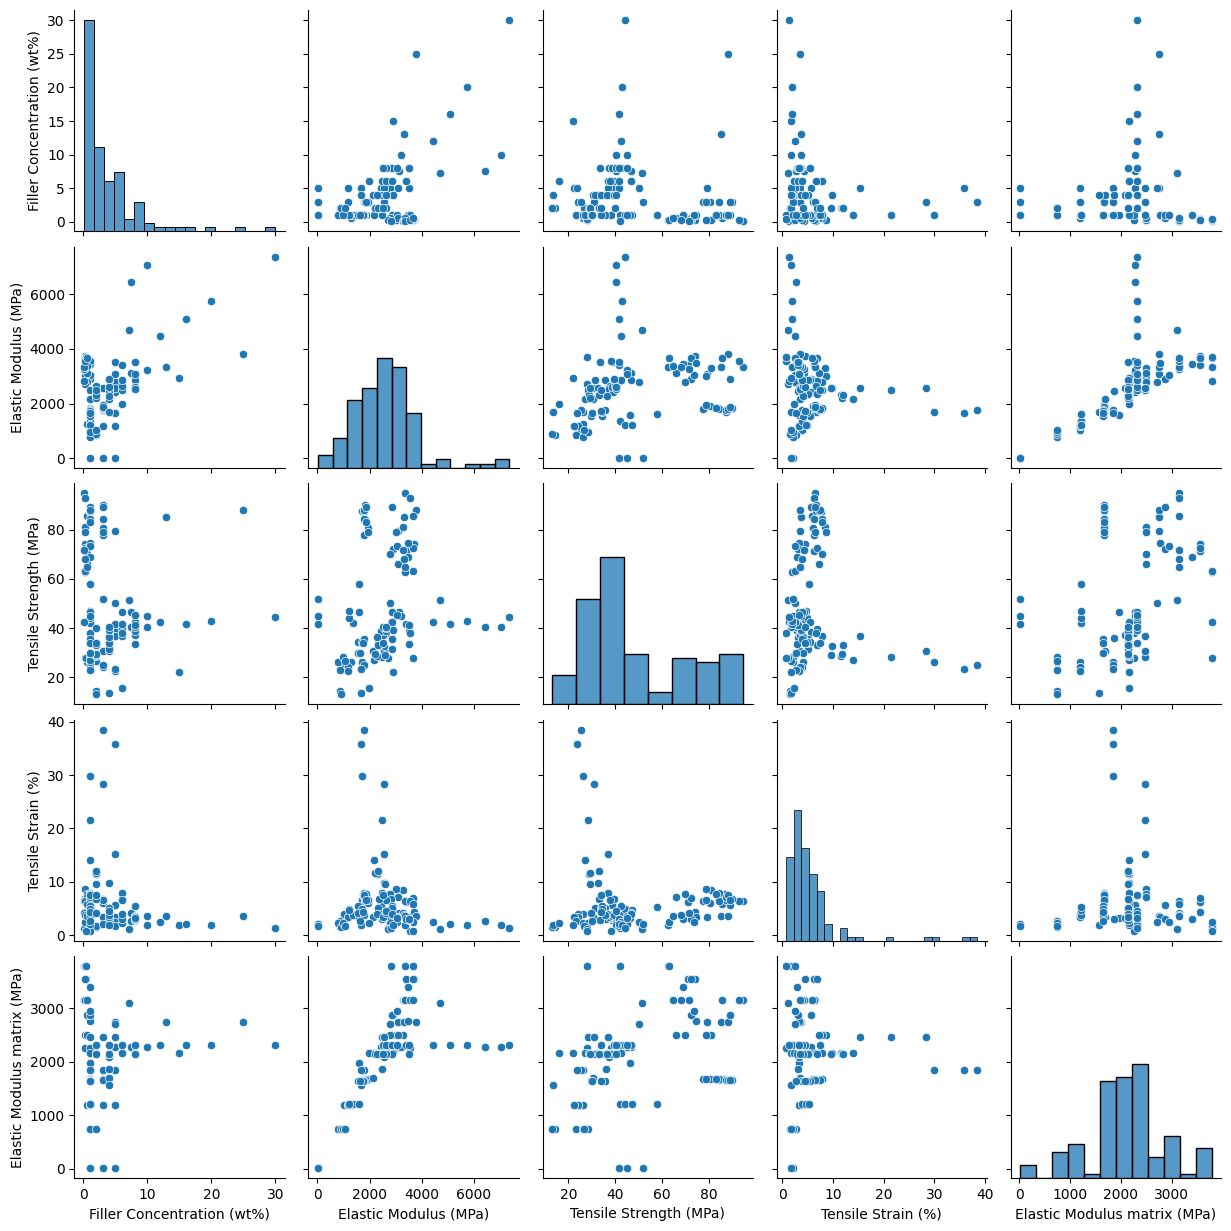

In [ ]:
sns.pairplot(nanocomposites)

In [ ]:
nanocomposites.columns

Index(['Polymer Matrix', 'Filler', 'Filler Concentration (wt%)',
       'Elastic Modulus (MPa)', 'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)'],
      dtype='object')

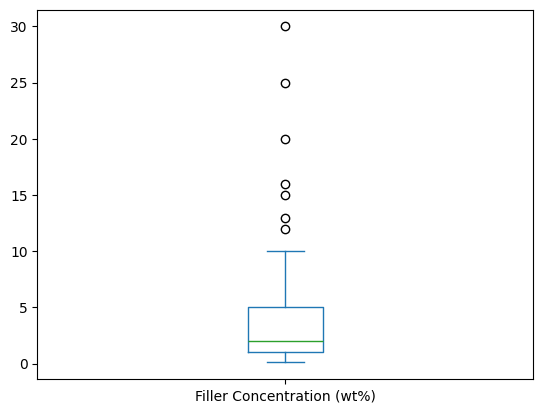

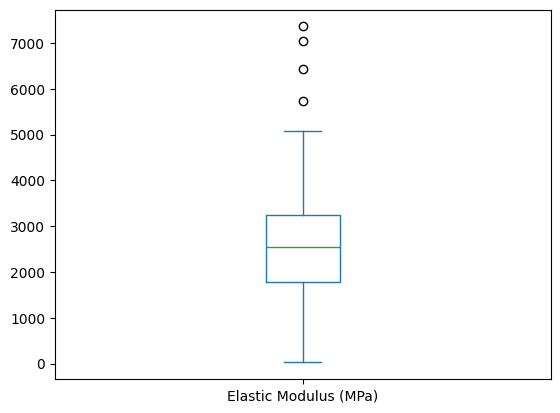

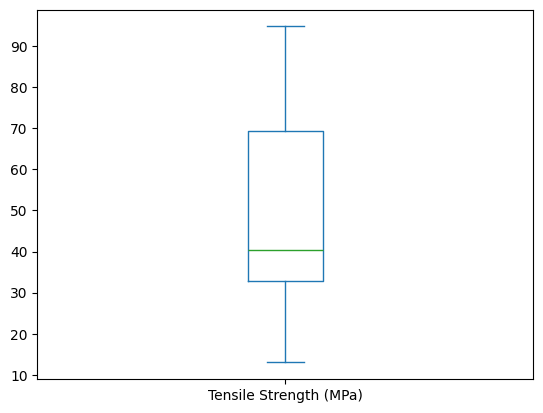

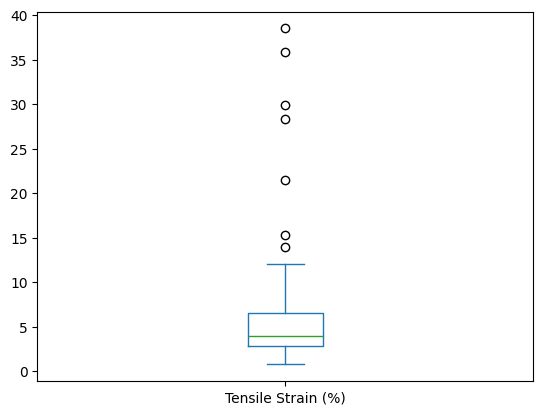

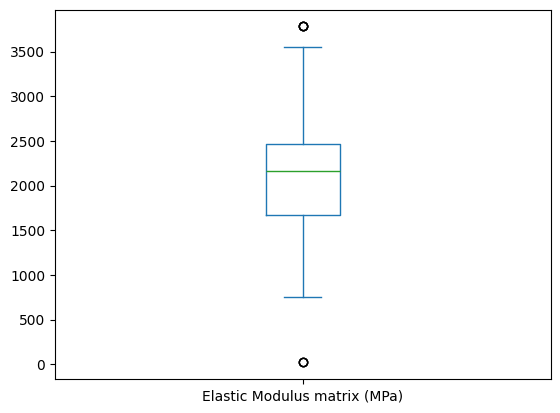

In [ ]:
#vedo diversi outliers. vedo così se il modello va (e come funziona). faccio già un dataframe a parte pronto per dopo
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    nanocomposites[[colonna]].plot(kind='box')

In [ ]:
#per dopo:
outliers_dict={}
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    Q1=nanocomposites[colonna].quantile(0.25)
    Q3=nanocomposites[colonna].quantile(0.75)
    IQR=Q3-Q1
    limite_basso=Q1- 1.5*IQR
    limite_alto=Q3+1.5*IQR
    outliers_colonna=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)]
    outliers_dict[colonna] = outliers_colonna

In [ ]:
#per dopo
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler', 'Tensile Strength (MPa)']:
    print("outliers di: "+colonna)
    display(outliers_dict[colonna]) #c'è qualcosa che non va, perché in elastic modulus matrix gli outliers dovrebbero essere solo 2

outliers di: Filler Concentration (wt%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
18,Epoxy,Nanosilica,13.0,3330.0,85.25,3.62,2750.0
19,Epoxy,Nanosilica,25.0,3800.0,88.11,3.52,2750.0
81,ABS,MWCNT,15.0,2917.3,22.00,1.80,2159.8
107,ABS,GNP,12.0,4450.0,42.40,2.50,2315.0
108,ABS,GNP,16.0,5072.0,41.60,2.00,2315.0
109,ABS,GNP,20.0,5725.0,42.90,1.90,2315.0
110,ABS,GNP,30.0,7362.0,44.30,1.30,2315.0


outliers di: Elastic Modulus (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
15,ABS,SWCNT,7.5,6434.0,40.5,2.6,2278.0
16,ABS,SWCNT,10.0,7045.0,40.3,1.8,2278.0
109,ABS,GNP,20.0,5725.0,42.9,1.9,2315.0
110,ABS,GNP,30.0,7362.0,44.3,1.3,2315.0


outliers di: Tensile Strain (%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
44,PET,TiO₂,1.0,2486.1,28.30,21.50,2467.2
45,PET,TiO₂,3.0,2561.3,30.70,28.30,2467.2
46,PET,TiO₂,5.0,2572.8,36.90,15.30,2467.2
47,PLA,TiO₂,1.0,1710.0,26.33,29.86,1840.0
48,PLA,TiO₂,3.0,1780.0,25.14,38.50,1840.0
49,PLA,TiO₂,5.0,1660.0,23.47,35.82,1840.0
76,ABS,MWCNT,1.0,2169.1,26.90,14.00,2159.8


outliers di: Elastic Modulus matrix (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
40,Epoxy,MWCNT,0.1,2823.00,42.24,1.40,3782.00
41,Epoxy,MWCNT,0.2,3345.00,62.56,1.96,3782.00
42,Epoxy,MWCNT,0.3,3680.00,63.04,2.52,3782.00
43,Epoxy,MWCNT,0.4,3684.00,28.00,0.76,3782.00
50,PET,Clay,1.0,23.93,45.00,2.07,19.59
51,PET,Clay,3.0,28.14,51.79,2.01,19.59
52,PET,Clay,5.0,25.89,41.55,1.73,19.59


In [ ]:
#per dopo
outliers=outliers_dict['Elastic Modulus matrix (MPa)']
print(outliers['Elastic Modulus matrix (MPa)'].value_counts())
#sono valori sovrapposti, ecco perché gli outliers sono 7 ma il box plot me ne fa vedere 2
#si vedeva già se guardavo la colonna di elastic modulus btw

Elastic Modulus matrix (MPa)
3782.00    4
19.59      3
Name: count, dtype: int64


In [ ]:
#per dopo
outliers_index=list(outliers.index)
print('lista indici outliers di Elastic Modulus matrix (MPa): '+str(list(outliers.index)))
print('righe e colonne: '+str(nanocomposites.shape))
#nanocomposites_no_out_all=nanocomposites.drop(outliers_index)
#nanocomposites_no_out_all=nanocomposites.drop(outliers)

lista indici outliers di Elastic Modulus matrix (MPa): [40, 41, 42, 43, 50, 51, 52]
righe e colonne: (115, 7)


In [ ]:
#per dopo
nanocomposites_no_out_all=nanocomposites.drop(outliers_index)
nanocomposites_no_out_all.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


In [ ]:
#per dopo
nanocomposites_no_out_all.shape
#dopo poi rifaccio i grafici con sns.pairplot

(108, 7)

In [ ]:
#ora riprendo il procedimento con nanocomposites_encoded
nanocomposites_encoded.head(3)
#len(nanocomposites_encoded)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#definisco feature (input) e target (output)
nanocomposites_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO'],
      dtype='object')

In [ ]:
X=nanocomposites_encoded[['Filler Concentration (wt%)', 'Elastic Modulus matrix (MPa)','Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO']]
y=nanocomposites_encoded[['Elastic Modulus (MPa)', 'Tensile Strength (MPa)', 'Tensile Strain (%)']]
X.head(3)

,Filler Concentration (wt%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,0.4,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,0.2,3554.7,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
y.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
0,3722.4,74.2,4.4
1,3407.2,71.1,6.2
2,3654.5,72.4,6.9


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #20% delle osservazioni nel testing set

In [ ]:
len(y_test)

23

In [ ]:
len(y_train)

92

In [ ]:
model=RandomForestRegressor(n_estimators=500,max_features='sqrt', random_state=42, oob_score=True)

In [ ]:
rf=model.fit(X_train,y_train)

In [ ]:
rf.oob_score_ #78%

0.7838864044680683

In [ ]:
rf.feature_importances_ #ovviamente le feature più importanti risultano essere le 2 numeriche

array([0.32584583, 0.37053113, 0.01776435, 0.0238733 , 0.03449789,
       0.00190137, 0.02480859, 0.03220964, 0.01467229, 0.0003851 ,
       0.00566676, 0.01992527, 0.00262343, 0.07764301, 0.00798924,
       0.00505328, 0.01137198, 0.02323755])

<Axes: >

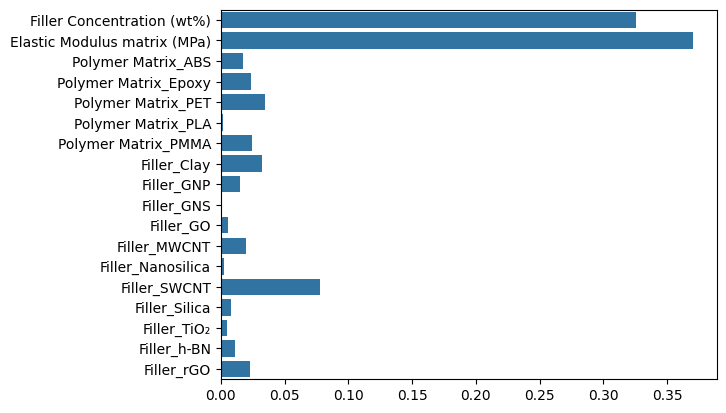

In [ ]:
#faccio un bar plot per vederlo graficamente
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_)

In [ ]:
nanocomposites_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Filler Concentration (wt%)    115 non-null    float64
 1   Elastic Modulus (MPa)         115 non-null    float64
 2   Tensile Strength (MPa)        115 non-null    float64
 3   Tensile Strain (%)            115 non-null    float64
 4   Elastic Modulus matrix (MPa)  115 non-null    float64
 5   Polymer Matrix_ABS            115 non-null    bool   
 6   Polymer Matrix_Epoxy          115 non-null    bool   
 7   Polymer Matrix_PET            115 non-null    bool   
 8   Polymer Matrix_PLA            115 non-null    bool   
 9   Polymer Matrix_PMMA           115 non-null    bool   
 10  Filler_Clay                   115 non-null    bool   
 11  Filler_GNP                    115 non-null    bool   
 12  Filler_GNS                    115 non-null    bool   
 13  Fille

In [ ]:
pred_properties=rf.predict(X_test) #calcolo delle y a partire dalle X di test

In [ ]:
y_test #y reali che avevamo messo da parte

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
81,2917.3,22.00,1.80
4,1021.0,24.00,3.96
40,2823.0,42.24,1.40
69,1805.0,88.00,7.50
10,1610.0,58.00,5.22
45,2561.3,30.70,28.30
70,1866.0,89.00,6.50
66,1842.0,90.00,6.70
47,1710.0,26.33,29.86
11,2429.0,38.40,5.60


In [ ]:
mae=mean_absolute_error(y_true=y_test, y_pred=pred_properties)
print('MAE: '+str(mae))

MAE: 94.10441582246915


In [ ]:
mse=mean_squared_error(y_true=y_test, y_pred=pred_properties)
rmse=math.sqrt(mse)
print('RMSE: '+str(rmse))

RMSE: 200.19224845936674


In [ ]:
r2=rf.score(X_test, y_test)
print('R2:'+str(r2))

R2:0.8197479423995743


In [ ]:
pred_properties #è un array numpy. metto in un dataframe pandas pred_properties_df

array([[3.45753851e+03, 4.25257529e+01, 4.40206810e+00],
       [1.29091203e+03, 2.70025951e+01, 4.12448714e+00],
       [3.43355780e+03, 6.06569333e+01, 2.44662667e+00],
       [1.75185688e+03, 8.69883726e+01, 6.93004524e+00],
       [1.30224179e+03, 4.51034244e+01, 4.60495031e+00],
       [2.41129459e+03, 3.50033400e+01, 1.69555200e+01],
       [1.82627749e+03, 8.38224160e+01, 6.39320214e+00],
       [1.82627749e+03, 8.38224160e+01, 6.39320214e+00],
       [1.76112895e+03, 3.13240743e+01, 2.70633663e+01],
       [3.12867105e+03, 4.03068276e+01, 4.21004667e+00],
       [1.64306518e+03, 3.24796726e+01, 4.31121063e+00],
       [8.33840911e+02, 2.37653578e+01, 2.31544889e+00],
       [2.64615140e+03, 3.79062026e+01, 7.17807643e+00],
       [3.01497169e+03, 4.23679202e+01, 4.14565405e+00],
       [3.79324760e+03, 7.23560400e+01, 3.26552000e+00],
       [3.37668480e+03, 7.06077827e+01, 6.00861933e+00],
       [2.56027019e+03, 3.52604958e+01, 4.65390939e+00],
       [3.27986722e+03, 7.84738

In [ ]:
y_test.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
81,2917.3,22.00,1.80
4,1021.0,24.00,3.96
40,2823.0,42.24,1.40


In [ ]:
pred_properties_df=pd.DataFrame(pred_properties, columns=y_test.columns, index=y_test.index)
pred_properties_df
pred_properties_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
81,3457.538511,42.525753,4.402068
4,1290.912026,27.002595,4.124487
40,3433.557800,60.656933,2.446627


In [ ]:
for colonna in pred_properties_df:
  mae_each_target=mean_absolute_error(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target))


Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 273.8169372081063
RMSE di Elastic Modulus (MPa) : 346.5995308392973
R2 di Elastic Modulus (MPa) : 0.78065222094598
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 6.837112311123702
RMSE di Tensile Strength (MPa) : 9.553090490223168
R2 di Tensile Strength (MPa) : 0.8364195476084995
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.6591979481774226
RMSE di Tensile Strain (%) : 2.883177711327682
R2 di Tensile Strain (%) : 0.8421720586442436


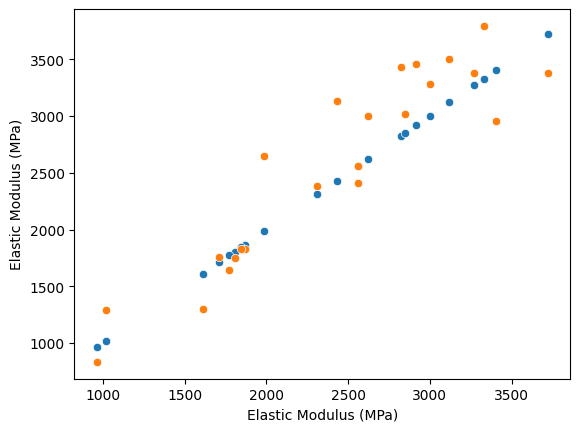

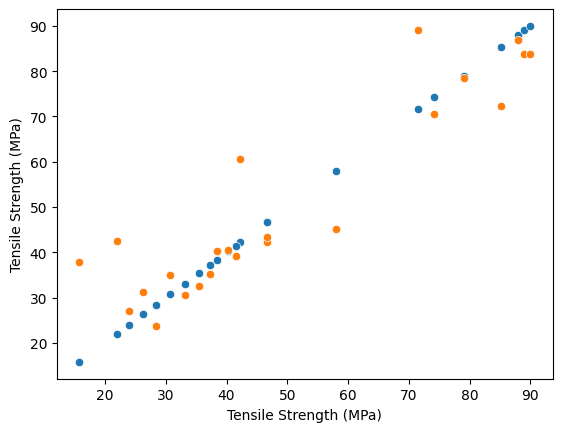

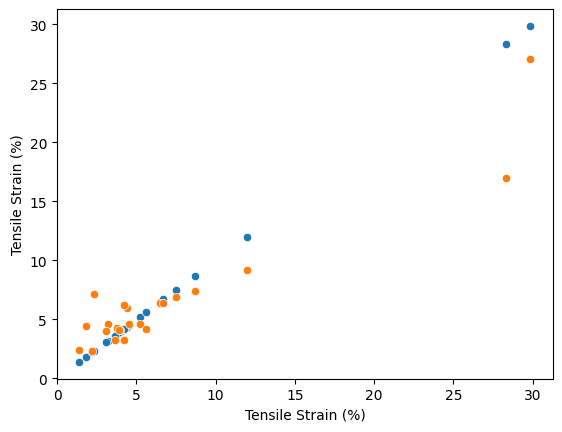

In [ ]:
#controllo quanto le mie previsioni sono lontane da quelle ideali

for colonna in pred_properties_df:
  fix,ax=plt.subplots()
  sns.scatterplot(x=y_test[colonna],y=y_test[colonna], ax=ax)
  sns.scatterplot(x=y_test[colonna],y=pred_properties_df[colonna], ax=ax)
  #punti arancioni: previsioni
  #punti blu: target nel testing set

